<a href="https://colab.research.google.com/github/michelgoncalves/projects/blob/master/MAG_Projeto_Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito
por Michel Antônio Gonçalves - https://linkedin.com/in/michel-antonio-goncalves

&nbsp;


<img src="https://miro.medium.com/max/900/1*FX1e5NRetKentjpga4MLIg.jpeg" width="90%"/>

[Fonte da imagem](https://miro.medium.com/max/900/1*FX1e5NRetKentjpga4MLIg.jpeg)

## Em 2018, 24,26 bilhões de dólares foram perdidos globalmente devido à fraudes de cartões de crédito - um aumento de 18,4% em relação ao período anterior. A tendência é que esse crescimento se intensifique.  

[Fonte: Shift Credit Card Processing](https://shiftprocessing.com/credit-card-fraud-statistics/)

Considerada a maneira número 1 de furto de identidade no mundo, a fraude via cartão de crédito é um problema crônico em escala global.  

As inovações tecnológicas oferecem crescentes facilidades para o consumidor, tais como o e-commerce, pagamentos digitais, bem como uma infinidade de apps de serviços que usam do cartão de crédito como forma primária de pagamento. Na mesma via, contudo, inovam-se também os meios que terceiros utilizam para clonar cartões de crédito e realizar uma série de compras indevidas sob a identidade da vítima. O resultado: estresse por parte do consumidor e prejuízos crescentes para as instituições financeiras que, ao ressarcir o cliente lesado, fica com o prejuízo oriundo da fraude, prejuízo que, se analisado em escala global, acumula-se na casa dos bilhões.



## Somente no Brasil, os prejuízos com fraudes de cartão de crédito totalizaram aproximadamente R$1,8 bilhão. Afetando em torno de 12,1 milhões de pessoas no país.
[Fonte: Época Negócios](https://epocanegocios.globo.com/Brasil/noticia/2019/08/fraudes-financeiras-geraram-um-prejuizo-de-cerca-de-r-18-bilhao-em-12-meses.html) 

Considerando a gravidade desse problema na sociedade mundial, muitos são os esforços das áreas financeira, de segurança e, principalmente, de tecnologia para a criação de soluções focadas em minimizar as fraudes de cartão de crédito. Por trás dessas soluções inovadoras, trabalham modelos de inteligência artificial cada vez mais sofisticados, capazes de agir de forma preventiva para mapear os padrões das compras fraudulentas, de modo a interrompê-las em tempo hábil. 


# **1 - Objetivo deste projeto**

#### Com o objetivo de contribuir no combate às fraudes bancárias e minimizar prejuízos das instituições financeiras, esse notebook utilizará de técnicas de *Data Science*, em cima de uma base de dados bancária real, para desenvolver um modelo de *machine learning* capaz de: 

* Analisar diferentes padrões de compra e transação bancária para aperfeiçoar o desempenho na detecção de transações fraudulentas, possibilitando a interrupção mais rápida das atividades ilegais, minimizando o estresse do consumidor e reduzindo os prejuízos das instituições financeiras. 

* Ao mesmo tempo, o modelo buscará minimizar a ocorrência de "falsos positivos" - onde uma compra legítima pelo cartão é qualificada como fraudulenta, ocasionando o bloqueio da operação financeira (ou mesmo do cartão), assim provocando transtorno e constrangimento ao consumidor. 

# **2 - Origem dos dados**

A base de dados utilizada neste notebook foi coletada, analisada e montada pelo trabalho conjunto da *Worldline* e o *Machine Learning Group* da ULB (*Université Libre de Bruxelles*)

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* (base de dados) contém operações financeiras realizadas por usuários europeus de cartão de crédito, abrangendo transações ocorridas durantes 2 dias do mês de setembro do ano de 2013. 

Nessa base, das quase 290 mil transações, 492 foram classificadas como fraudes. 


<img src="https://4brf13430svm3bnu053zbxvg-wpengine.netdna-ssl.com/wp-content/uploads/2016/03/Credit-Card-Fraud.jpg" width="70%"/>

[Fonte  da imagem](https://4brf13430svm3bnu053zbxvg-wpengine.netdna-ssl.com/wp-content/uploads/2016/03/Credit-Card-Fraud.jpg)




#**3 - Importando os dados e bibliotecas necessárias**

Inicialmente, serão importadas as bibliotecas *Python* necessárias para o desenvolvimento da análise exploratória. Em seguida, o arquivo `csv` será importado para uma estrutura de *DataFrame* (df) a ser manipulada pela biblioteca `pandas`. Já as bibliotecas `matplotlib` e `seaborn` serão utilizadas para geração de gráficos referentes à base de dados.

As bibliotecas de *Machine Learning*, necessárias para construção do algoritmo, serão importadas em uma etapa posterior desse projeto.

In [0]:
# importar os pacotes necessários para análise exploratória

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')


# importar os dados para um dataframe

file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

df = pd.read_csv(file_path)


# **4 - Análise Exploratória do *dataset***

Com os dados importados para dentro de uma estrutura *Dataframe* (df) e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, iniciaremos a **análise exploratória dos dados**, buscando detectar irregularidades e realizar os ajustes necessários para que o modelo de *Machine Learning* seja posteriormente desenvolvido de maneira otimizada. 

## 4.1 - Tamanho da base de dados


In [0]:
df.shape

(284807, 31)

In [0]:
#Número de entradas(linhas) e variáveis (colunas) do dataset

print('Número de entradas:\t{}'.format(df.shape[0]))
print('Número de variáves:\t{}'.format(df.shape[1]))

Número de entradas:	284807
Número de variáves:	31


In [0]:
#5 primeiras entradas do dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
#5 últimas entradas do dataset
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [0]:
#Identificação de todas as variáveis (colunas) do DataFrame
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [0]:
#Categoria dos dados de cada variável (coluna)
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


## 4.2 - Identificação e descrição das variáveis (colunas) que compõem o *dataset* 

* `Time` - Representa (em segundos) o tempo passado entre cada transação financeira em relação a primeira transação do *dataset*.

* `Amount` - Representa a quantia monetária envolvida em cada transação. 

* `Class` - **É a nossa variável alvo**, pois classifica as transações financeiras entre: 
  * **0**: Se a transação for normal 
  * **1**: Se a transação for fraudulenta

* `V1`, `V2`, `V3`, `V4` até `V28` - Representam as demais 28 variáveis numéricas do *dataset*. Todas elas foram descaracterizadas com o objetivo de proteger a privacidade e segurança dos dados originais. Essas variáveis passaram pelo procedimento PCA (*Principal Component Analysis*) - que estabelece relações em um grande conjunto de variáveis, reduzindo a um grupo menor (no caso, essas 28) para otimizar a análise, sem que haja perde significativa de informação.



## 4.3 - Correlação entre as variáveis (colunas) do *dataset* 

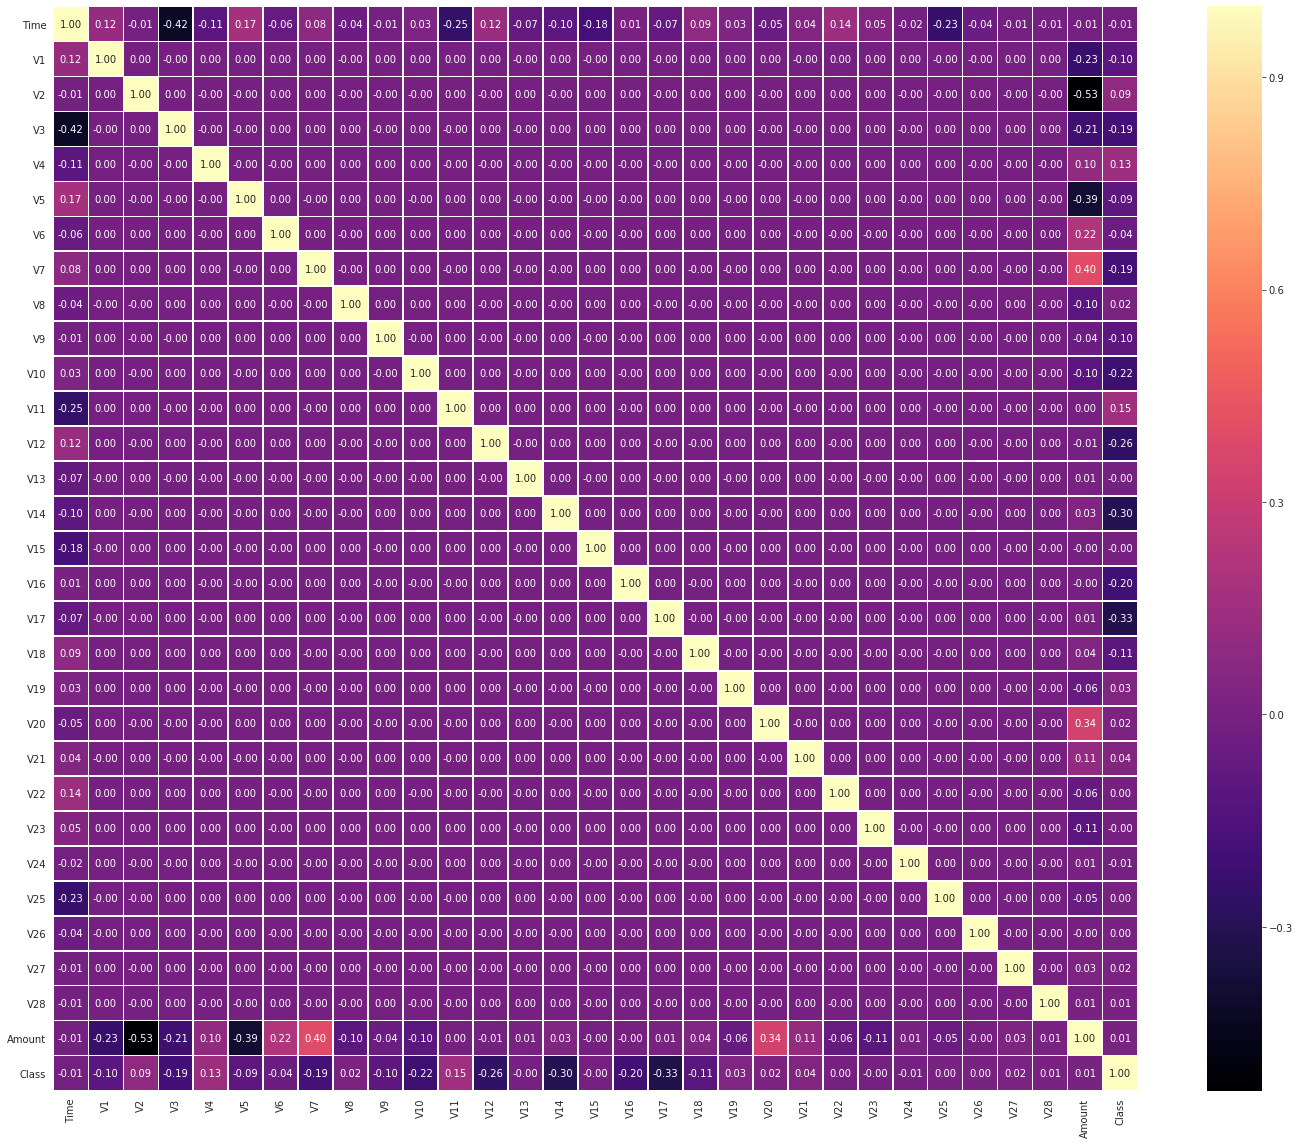

In [0]:
corr = df.corr()

f, ax=plt.subplots(figsize=(20,16))
sns.heatmap(corr, ax=ax, cmap='magma', square=True, annot=True, fmt='.2f', linecolor='white', linewidths=.5)
plt.tight_layout();

> O dataset **não apresenta correlações consideradas fortes**, ou seja, **superiores a 0.7** no caso das correlações positivas e **inferiores a -0.7** no caso das correlações negativas.  


## 4.4 - Verificação da presença de valores ausentes 

**Valores ausentes possuem o potencial de afetar a precisão de certas análises realizadas em uma base de dados.** Sendo assim, utilizaremos a biblioteca *pandas* para identificar a quantidade de valores ausentes presentes nas entradas (linhas) e variáveis (colunas) do *dataset*, facilitando o processo de limpeza de dados, bem como a eficiência de futuras análises. 

In [0]:
df.isnull().sum().sort_values(ascending=False)

Class     0
V14       0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V15       0
Amount    0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Time      0
dtype: int64

In [0]:
df.isnull().sum().max()

0

> A soma dos valores ausentes para cada uma das variáveis (colunas) é igual a zero. Ou seja, a base de dados é completa, sem a presença de valores ausentes.



## 4.5 - Verificação de valores desbalanceados 

O *dataset* abrange operações financeiras que aconteceram dentro do período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações. Ou seja, há uma expressiva discrepância entre o número de transações legítimas e tranções fraudulentas.

Para confirmar a presença desse desbalanceamento, analisaremos a variável-alvo `Class` e plotaremos, em um gráfico de barras, as entradas para cada uma de suas categorias, sendo "0" para as transações normais e "1" para classificar fraudes.  

In [0]:
df.shape[0]

284807

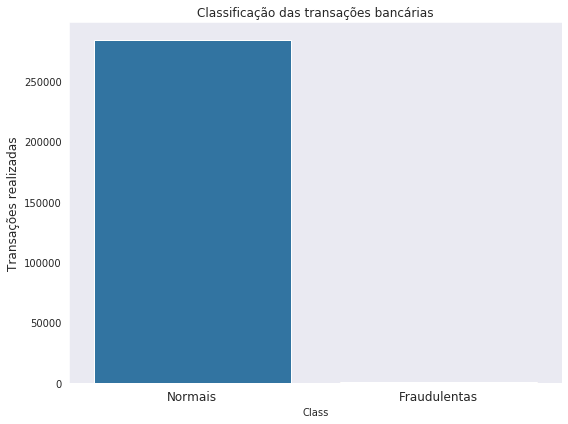

In [0]:
fig, ax=plt.subplots(figsize=(8,6))

sns.countplot(df['Class'])
ax.set_title('Classificação das transações bancárias')
ax.set_ylabel('Transações realizadas', fontsize=12)
ax.set_xticklabels(['Normais', 'Fraudulentas'], fontsize=12)
plt.tight_layout()


In [0]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [0]:
df['Class'][df['Class'] == 1].value_counts() / df.shape[0]

1    0.001727
Name: Class, dtype: float64

In [0]:
(df['Class'][df['Class'] == 1].shape[0] / df.shape[0]) * 100

0.1727485630620034


> O gráfico de barras deixou ainda mais evidente a discrepância entre as categorias da variável-alvo `Class`, onde as fraudes, representadas pela classificação "1", correspondem a apenas 0,17% do total das entradas do *dataset*. Como nosso objetivo é utilizar essa base de dados para alimentar um algoritmo de *Machine Learning* capaz de diferenciar fraudes das transações normais, é importante que façamos o procedimento de balanceamento dos dados. 
  


## 4.6 - Resumo estatístico do *dataset* 

In [0]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- As variáveis `V1` até `V28` passaram por um processo estatístico (PCA), o resumo estatístico, no caso, não apresenta irregularidades. 

* A variável `Class` é categórica, e a disparidade entre o número de entradas de suas categorias já foi previamente apontada.

* A variável `Time` representa os segundos passados entre as transações, ou seja, não há como levantar, pelo resumo estatístico, alguma irregularidade. 

Da variável `Amount`, que representa o valor financeiro das transações realizadas no *dataset*, o resumo estatístico nos mostra que: 

* Enquanto a média (*mean*) é 88,34 e a mediana (*median*) é 22. Essa disparidade aponta a presença de *outliers* (valores discrepantes), algo reforçado pela entrada de valor máximo de 25691.

* 75% dos valores monetários envolvidos nas transações são menores que 77,16. Considerando que a base de dados é européia, vamos supor que a maior parte das transações (sejam elas normais ou fraudulentas) não superam 77,16 Euros. Ou seja, a maior parte das transações bancárias envolvem valores baixos. 
 


## 4.7 - Análise da variável-alvo do *dataset* 

Como dito anteriormente, nossa variável-alvo no *dataset* é a `Class` - pois ela é a que classifica se a transação foi legítima ou fraude. Sendo assim, faremos algumas análises em cima dessa variável para extrair alguns *insights* sobre seu comportamento. 

Primeiramente, vamos analisar a distribuição das transações em função do tempo `Time`. Para isso, plotaremos dois histogramas: o primeiro levantando somente as transações classificadas como normais, e o segundo considerando exclusivamente as transações fraudulentas.

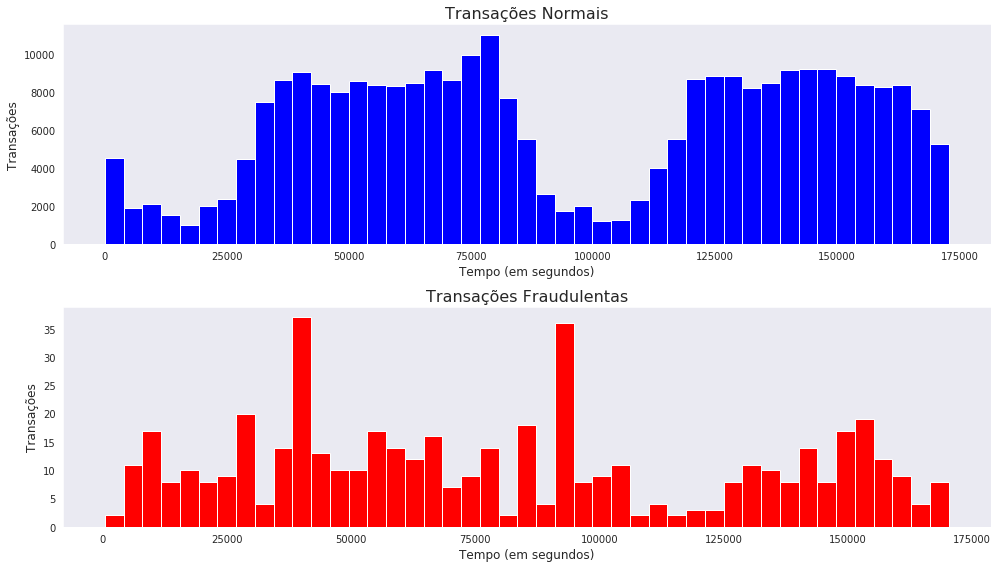

In [0]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,8))

num_bins = 45

ax[0].hist(df['Time'][df['Class'] == 0], bins=num_bins, color='b')
ax[0].set_title('Transações Normais', fontsize=16)
ax[0].set_xlabel('Tempo (em segundos)', fontsize=12)
ax[0].set_ylabel('Transações realizadas', fontsize=12)

ax[1].hist(df['Time'][df['Class'] == 1], bins=num_bins, color='r')
ax[1].set_title('Transações Fraudulentas', fontsize=16)
ax[1].set_xlabel('Tempo (em segundos)', fontsize=12)
ax[1].set_ylabel('Transações realizadas', fontsize=12)


plt.tight_layout()

> Pelos histogramas, não foi possível encontrar algo que diferencie o comportamento das transações normais e das fraudes em função do tempo.



Ainda na análise da variável `Class`, vamos analisar seu comportamento em função do valor monetário movimentado em cada transação (variável `Amount`) - para tal, plotaremos dois *boxplots*, um para as transações normais e outro para as fraudulentas. 

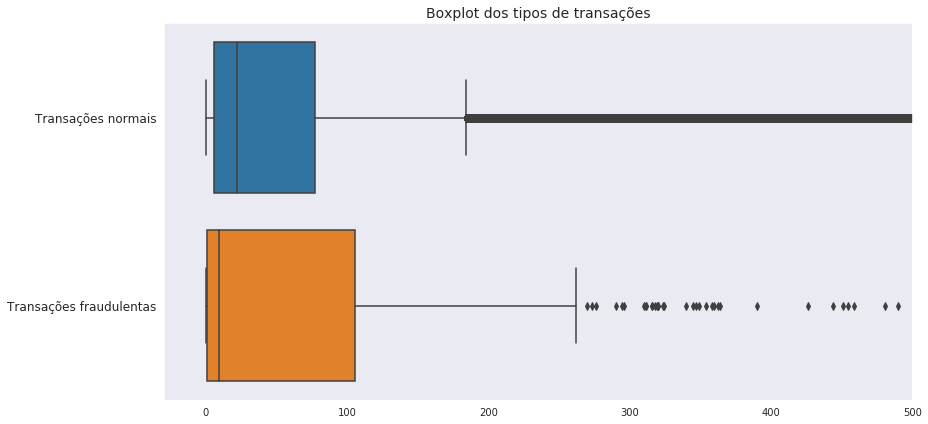

In [0]:
fig, ax = plt.subplots(figsize=(13,6))

sns.boxplot(df['Amount'], df['Class'], ax=ax, orient='h')
plt.xlim((-30, 500))
plt.yticks([0,1], ['Transações normais', 'Transações fraudulentas'], fontsize=12)
ax.set_title('Boxplot dos tipos de transações', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('')


plt.tight_layout()

In [0]:
df[(df['Class'] == 1) & (df['Amount'] < 2000)]['Amount'].describe()

count     491.000000
mean      118.130550
std       240.439028
min         0.000000
25%         1.000000
50%         9.210000
75%       105.350000
max      1809.680000
Name: Amount, dtype: float64

> Como constatado no resumo estatístico, a maior parte das transações abrangem valores financeiros mais baixos, contudo é possível notar que, proporcionalmente, a maior parte transações fraudulentas envolvem valores maiores do que a maior parte das transações normais. Essa diferença de comportamento contribuirá para que o modelo de *Machine Learning* tenha mais precisão para diferenciar os dois tipos de transação. 



Por fim, plotaremos uma série de gráficos de densidade, onde as duas classificações da variável `Class` ("0" para transações normais e "1" para fraudes), terão suas distribuições aplicadas em função das variáveis do *dataset* que passaram pelo procedimento PCA (`V1` até `V28`). O objetivo é detectar visualmente em quais situações as fraudes e as transações legítimas se comportam de maneira distinta, criando assim mais um importante parâmetro de diferenciação para alimentar o modelo de *Machine Learning*. 

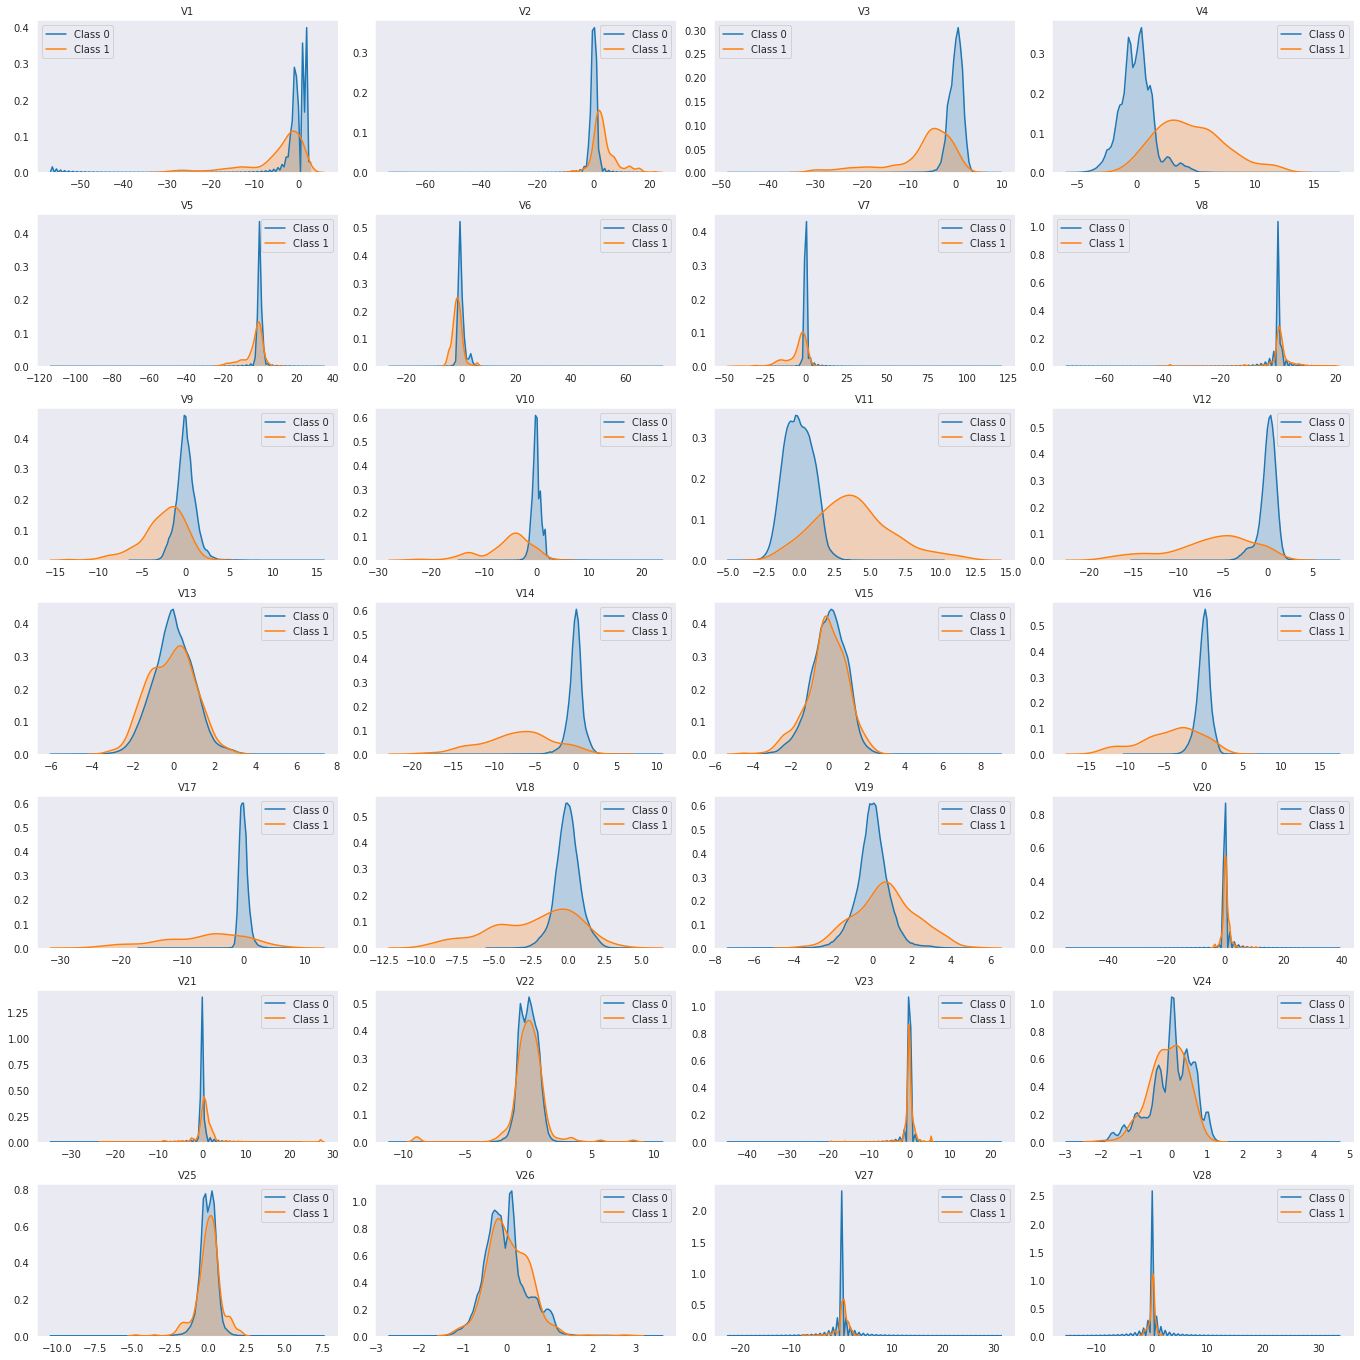

In [0]:
colunas = df.drop(['Class', 'Amount', 'Time'], axis=1).columns 
num_plots = len(colunas)
df_class_0 = df[df['Class'] == 0]
df_class_1 = df[df['Class'] == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(19,19))

idx = 0
for col in colunas:
  idx += 1
  plt.subplot(7, 4, idx)
  sns.kdeplot(df_class_0[col], label='Class 0', shade=True)
  sns.kdeplot(df_class_1[col], label='Class 1', shade=True)
  plt.title(col, fontsize=10)
plt.tight_layout()

> As transações normais e fraudulentas tem suas distribuições mais discrepantes quando associadas às variáveis V3, V4, V9, V10, V11, V12, V14, V16 e V17. Essas discrepâncias mais expressivas facilitam a detecção de fraudes em meio a um total de transações bancárias. 



## Inserir as conclusões sobre a análise exploratória

* O *dataset* não possui valores ausentes;
* Não há correlação expressiva entre as variáveis do *dataset*;
* Antes do desenvolvimento do algoritmo, é necessário balancear os dados da base, uma vez que as fraudes correspondem a apenas 0,17% do total das entradas na variável-alvo `Class`;
* A análise exploratória mostrou que as transações fraudulentas envolvem valores baixos, similar a maioria das transações legítimas. Contudo, os valores das fraudes são ligeiramente mais elevados, o que pode auxiliar o algoritmo a distiguir com mais eficiência os tipos de transações;
* Quando analisadas sob cada variável PCA (`V1` a `V28`) a distribuição das fraudes e transações legítimas demostraram, em diversos casos, comportamentos distintos - informação crucial para que o algoritmo tenha melhores condições de classificar corretamente as transações. 

---
---
---

# **5 - Preparação dos dados para *Machine Learning***
Antes de inciarmos a construção do modelo de *Machine Learning*, é fundamental realizar a preparação dos dados. No caso desse projeto isso se dará por meio das três seguintes etapas: 

## 5.1 - Normalização das variáveis `Time` e `Amount`

Normalização dos dados é um importante procedimento para alcançarmos melhores resultados em nossos algoritmos. A ideia é colocar diferentes variavéis numéricas na mesma ordem de grandeza, sem com que cada uma delas perca a diferença dentro do alcance de seus respectivos valores. 
Em outras palavras, colocaremos as variáveis `Time` e `Amount` sob a mesma balança, sem com que os valores próprios de suas entradas sofram alterações. 

**O objetivo é evitar que uma variável, cuja grandeza seja maior que a outra, exerça influência vastamente superior nos resultados do modelo preditivo.** 

Para realização desse procedimento, importaremos a função `StandardScaler`, que colocará as duas variáveis em questão na mesma ordem de grandeza. Após o procedimento, levantaremos as 5 primeiras entradas do *dataset* para verificarmos se as variáveis foram normalizadas. 

In [0]:
#Importando o pacote do Python para permitir a normalização 
from sklearn.preprocessing import StandardScaler

In [0]:
# Criando uma cópia do dataframe para limpeza dos dados
df_clean = df.copy()

In [0]:
std = StandardScaler()

In [0]:
df_clean['n_amount'] = std.fit_transform(df_clean['Amount'].values.reshape(-1,1))
df_clean['n_time'] = std.fit_transform(df_clean['Time'].values.reshape(-1,1))

In [0]:
df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

In [0]:
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,n_amount,n_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


## 5.2 - Divisão do conjunto de dados entre treino e teste

Para iniciarmos o processo de divisão dos conjuntos de dados entre treino e teste, primeiramente importaremos o recurso *Train Test Split* da biblioteca *Scikit-learn* que nos possibilitará realizar essa tarefa.

<img src="https://www.researchgate.net/profile/Brian_Mwandau/publication/325870973/figure/fig6/AS:639531594285060@1529487622235/Train-Test-Data-Split.png" width="60%"/>

[Fonte da imagem](https://www.researchgate.net/figure/Train-Test-Data-Split_fig6_325870973)




In [0]:
from sklearn.model_selection import train_test_split

Em seguida, definiremos as variáveis independentes 'X' e a variável dependente 'y', essa última corresponderá à variável `Class` do *dataset*.

In [0]:
X = df_clean.drop('Class', axis=1)
y = df['Class']

Por fim, realizaremos divisão das variavéis entre os conjuntos de treino (*train*) e teste (*test*). 

Considerando que a **y** representa a variável `Class` e que essa última possui uma grande desproporcionalidade em suas entradas (onde somente 0,17% representam as fraudes) utilizaremos o parâmetro *stratify*: que permitirá que os conjuntos de teste e treino de **y** recebam, proporcionalmente, todas as suas possíveis entradas.  

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

## 5.3 - Balanceamento dos dados

Conforme levantado na análise exploratória, há um expressivo desbalanceamento dos dados da base aqui estudada. Algo evidente na variável `Class`, onde resultados podem variar entre **0** para **transações normais** e **1** para **transações fraudulentas**. Contudo, somente 0,17% das entradas são classificadas como fraudulentas. 

Nesse cenário, se optássemos em rodar o algoritmo sem antes balancear os dados do *dataset*, ele terá um bom resultado somente para a **classe 0**, por essa ter a maioria praticamente absoluta do total de entradas. Porém, como nosso objetivo é criar um modelo de *machine learning* para identificar fraudes, é essencial que a **classe 1** esteja proporcionalmente presente no conjunto de treino.

Para isso, utilizaremos a técnica de ***undersampling*** que proporciona o balanceamento dos dados por meio da **eliminação aleatória de entradas da classe majoritária**, até que a mesma esteja **proporcional com a minoritária**. 

<img src="https://miro.medium.com/max/725/0*FeIp1t4uEcW5LmSM.png" width="90%"/>

[Fonte da imagem](https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets#t1) 






Iniciamos então com a importação do recurso de *undersampling* da biblioteca `imblearn`.

In [0]:
from imblearn.under_sampling import RandomUnderSampler

Em seguida, utilizaremos o recurso para balancear os dados e enviá-los ao conjunto de treino. 



In [0]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Após a aplicação da técnica, vamos plotar um gráfico para conferir se os dados estão balanceados.

1    369
0    369
dtype: int64


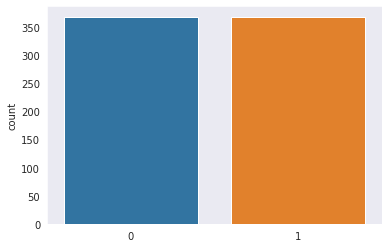

In [0]:
print(pd.Series(y_rus).value_counts())

sns.countplot(y_rus);

> Percebe-se que os dados tornaram-se balanceados e as classes passaram a ter o número de entradas equilibrado.



Para demonstrar a eficiência do balanceamento dos dados, plotaremos duas matrizes de correlação: uma com os dados ainda desbalanceados e outra com os dados balanceados.

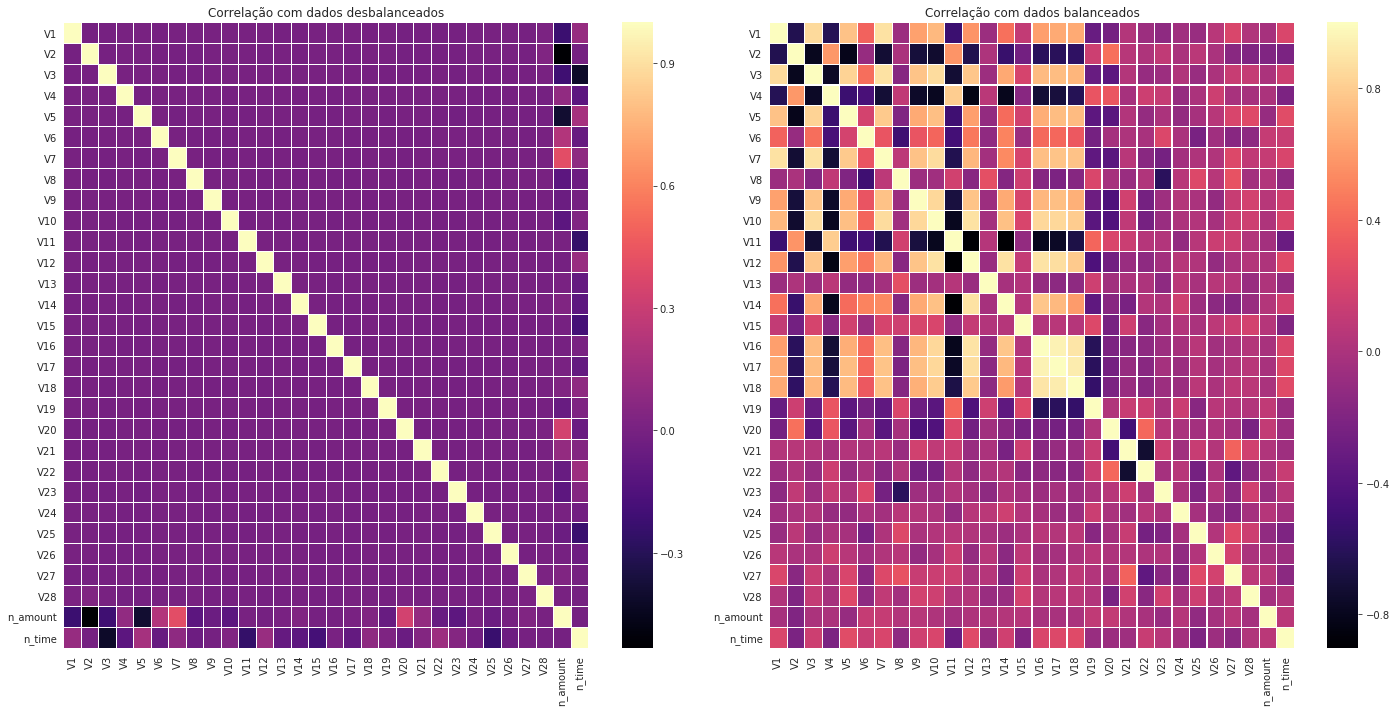

In [0]:
corr_des = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()

fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(20,10))

sns.heatmap(corr_des, ax=ax[0], xticklabels=corr_des.columns, yticklabels=corr_des.columns, cmap='magma', linewidths=.1)
ax[0].set_title('Correlação com dados desbalanceados')

sns.heatmap(corr_rus, ax=ax[1], xticklabels=corr_des.columns, yticklabels=corr_des.columns, cmap='magma', linewidths=.1)
ax[1].set_title('Correlação com dados balanceados')

plt.tight_layout();



> Na matriz com os dados desbalanceados, não há presença de correlações expressivas, devido uma quase hegemonia das entradas da classe majoritária. Já na correlação com os dados balanceados, esse mesma hegemonia foi descartada, e as classses foram devimente equilibradas, o que possibilitou correlações, positivas e negativas, muito mais expressivas.

#**6 - Construção do modelo de *Machine Learning* para detecção de fraudes**

Com os dados devidamente balanceados e os conjuntos de teste e treino preparados, vamos iniciar o processo de montagem do modelo de *Machine Learning*. Para tal, iniciaremos instalando e importando as bibliotecas necessárias.

In [0]:
#Instalação da biblioteca para visualização em Machine Learning 
!pip install -q scikit-plot

In [0]:
#Importação das bibliotecas de Machine Learning
import scikitplot as skplt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

Como estamos lidando com um **problema de classificação** onde devemos apontar **se há ou não fraude** nas transações bancárias, **o algorítimo mais adequado a ser o utilizado é o de regressão logística**, pois o mesmo se destina a classificar algo dentro de um conjunto de categorias.

Desta maneira, instanciaremos um modelo (*model*) de regressão logística para que os conjuntos previamente balanceados, `X_rus` e `y_rus`, sejam treinados. 

In [0]:
model = LogisticRegression()
model.fit(X_rus, y_rus)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Em seguida, realizaremos as previsões em cima dos dados de teste e exibiremos os indicadores de perfomance do modelo de *Machine Learning* por meio do relatório de classificação e matriz de confusão (*Confusion matrix*) 

In [0]:
y_pred = model.predict(X_test)
y_proba = model.predict(X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9633    0.9812     71079
           1     0.0412    0.9106    0.0788       123

    accuracy                         0.9632     71202
   macro avg     0.5205    0.9370    0.5300     71202
weighted avg     0.9982    0.9632    0.9797     71202

Acurácia do Modelo: 0.9632

AUC: 0.9370



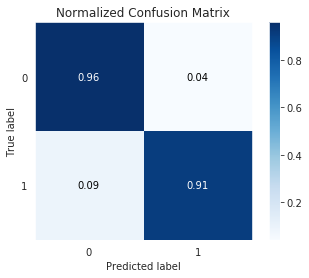

In [0]:
#Plotar a Matriz de Confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True);

#Exibir o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

#Acurácia do modelo
print("Acurácia do Modelo: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

#Imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

## 6.1 - Avaliação do desempenho do modelo

### *Definindo o que é positivo e negativo*

Para facilitar nossa análise, vamos associar como **positivo**, quando uma transação for classificada como **fraude**. Em contrapartida, **negativo** quando uma transação for normal, em outras palavras: **não é fraude**.

### *Matriz de confusão aplicada ao modelo*

A matriz de confusão é um resumo da performance do modelo, onde temos:

* *Verdadeiros negativos*: As transações que o modelo classificou como não-fraude e as mesmas de fato não eram **(previsão correta)**;

* *Falsos negativos*: Transações que o modelo classificou como não-fraude, mas as mesmas eram fraudes **(previsão incorreta)**;

* *Verdadeiros positivos*: Transações que o modelo classificou como fraude e as mesmas de fato eram fraudes **(previsão correta)**;

* *Falsos positivos*: Transações que o modelo classificou como fraude, mas eram na realidade, não-fraude **(previsão incorreta)**;

### *Acurácia alta não garante a eficiência desse modelo*
Acurácia (*accuracy*) é um indicador geral de perfomance do algoritmo: calculado com todos os acertos (verdadeiros positivos e verdadeiros negativos) do modelo sobre o total de transações bancárias.

Se analisarmos somente a acurácia, temos um **valor elevado de 0,963**, o que indica que o modelo é eficiente para prever a maioria dos resultados. Contudo, considerando que as fraudes correspondem a somente 0,17% das transações bancárias, ainda não sabemos se o modelo é de fato eficiente para detectar fraudes.

### *A importância da precisão e recall*

Para isso, teremos que dar destaque aos demais indicadores do relatório de classificação:

**Precisão (*precision*)** é calculada com o total de verdadeiros positivos sobre a soma dos verdadeiros positivos e falsos positivos. 
Ou seja, um indicador de precisão cada vez mais próximo ao valor máximo (1), significa que o modelo gerou poucos falsos positivos.



> No modelo, a precisão para detectar que as transações não são fraudulentas, é alta (0,9998 para a classe "0"). Ou seja, tem o potencial de minimizar o bloqueio de transações legítimas, erroneamente classificadas como fraude.



**Recall**, por sua vez, é calculado com o total de verdadeiros positivos sobre a soma dos verdadeiros positivos e os falsos negativos.  Ou seja, um *recall* de valor elevado mostra que o modelo gerou poucos falsos negativos. 



> No modelo, o recall alto (0,9106 para classe "1") demonstra a eficiência em minimizar as ocorrências onde uma fraude possa, por engano, ser considerada uma transação legítima.  




## Conclusão

* A transformação PCA (utilizada por razões de confidencialidade) e a disparidade entre da grande quantidade de transações legítimas em relação à baixa ocorrência de fraudes, exigiram extensos ajustes ao *dataset*, por meio da normalização de variáveis e balanceamento dos dados;

* Se os ajustes acima não fossem realizados, o modelo seria treinado exclusivamente sob a classificação das entradas não-fraudulentas, o que resultaria em uma alta acurácia, porém com capacidade praticamente nula em detectar fraudes;

* O balanceamento de dados na modelidade *undersampling* permitiu que o modelo de *machine learning* fosse treinado com as classificações de fraude e não-fraude incluídas na mesma proporção. Isso foi essencial para que o modelo apresentasse alguma eficiência na detecção de fraudes;

* O modelo de machine learning demonstrou boa capacidade de identificar transações legítimas e também de minimizar o número de fraudes erroneamente classificadas como transações legítimas. Contudo, há espaço para melhoria da performance sob a consequência de uma contrapartida. Tudo dependerá do que a instituição financeira deseja priorizar. Por exemplo: se a instituição financeira quer evitar ao máximo o transtorno dos clientes assegurando que nenhuma transação legítima seja erroneamente bloqueada, a contrapartida é que algumas fraudes poderão, potencialmente, ser classificadas como legítimas; ou se o foco for o bloqueio de praticamente todas as operações fraudulentas, a contrapartida é o potencial bloqueio erronôneo de algumas transações legítimas.

